In [60]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns

In [61]:
## read dataset
df=pd.read_csv('/config/workspace/Datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [62]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


 From the above observation we see that few column like pregnancies ,Glucose,BloodPressure,SkinThickness,Insulin and BMI have value 0 which is not possible.These features cannot have value 0.To deal with that we can simply remove it or replace it with their respective mean values 

In [63]:
## replacing the 0 value of the feature with the mean value of the respective feature which cannot have 0 value.
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['Pregnancies']=df['Pregnancies'].replace(0,df['Pregnancies'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [64]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

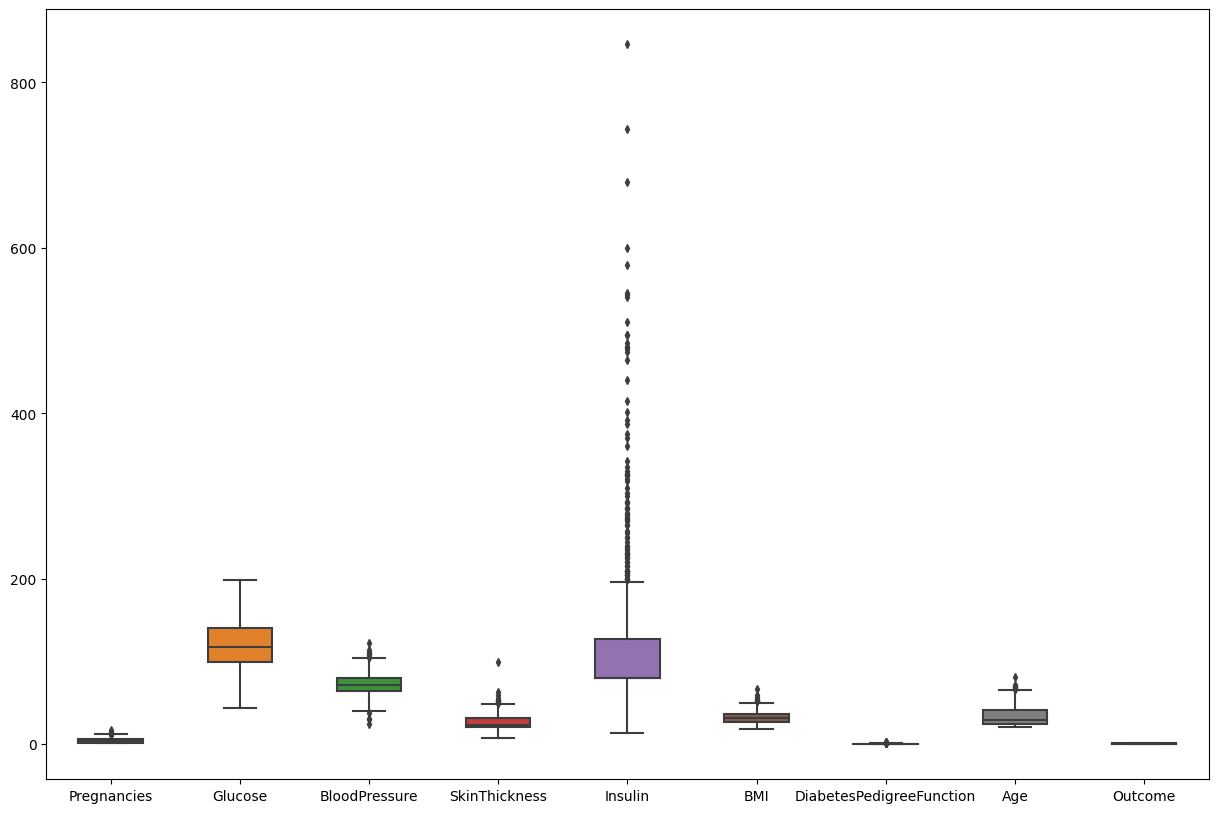

In [65]:
# Let's check for the outliers 
fix,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=4)     # fliersize is the size of the outlier

In [66]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [67]:
## segregate the dependent and independent features
x=df.iloc[:, :-1]  # Independent variable
y=df.iloc[:,-1]    # dependent variable

In [68]:
# separate dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [69]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [70]:
import pickle
# Standerd Scaling 
def std_scaler(xtrain,xtest):
    scaler=StandardScaler()
    x_train_scaled=scaler.fit_transform(xtrain)
    x_test_scaled=scaler.transform(xtest)

    # saving the model
    file= open('/config/workspace/Model/standerdScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    return x_train_scaled,x_test_scaled

In [71]:
x_train_scaled,x_test_scaled=std_scaler(x_train,x_test)

In [72]:
x_train_scaled

array([[ 1.5155415 , -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-1.14392562, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-0.19813531, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [-0.14662545, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.18040827, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.18580794,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [73]:
logistic_ger=LogisticRegression()

logistic_ger.fit(x_train_scaled,y_train)

LogisticRegression()

In [74]:
##  Hyperparamter Tuning
## GridSearchCV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
## parameter grid
parameters={
    'penalty':['l1','l2'],
    'C': np.logspace(-3,3,7),
    'solver':['lbfgs','newton-cg','liblinear']
}

In [75]:
logreg=LogisticRegression()
clf= GridSearchCV(logreg,                        # model
                param_grid=parameters,          # hyperparameter
                scoring='accuracy',             # metric for scoring 
                cv=10)                          # numner of folds

clf.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear']},
             scoring='accuracy')

In [76]:
clf.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [77]:
clf.best_score_

0.7655474894131882

#### Let's see how well our model perform on the test data

In [78]:
y_pred=clf.predict(x_test_scaled)

In [79]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[118,  12],
       [ 27,  35]])

In [80]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_nigative=conf_mat[1][0]
true_nigative=conf_mat[1][1]

In [81]:
accuracy=(true_positive+true_nigative)/(true_positive+false_positive+false_nigative+true_nigative)
accuracy

0.796875

In [82]:
precision=true_positive/(true_positive+false_positive)
precision

0.9076923076923077

In [83]:
recall=true_positive/(true_positive+false_nigative)
recall

0.8137931034482758

In [84]:
F1_score=2*(recall*precision)/(recall+precision)
F1_score

0.858181818181818

In [85]:
# pickling the model
file=open("/config/workspace/Model/modelforprediction.pkl","wb")
pickle.dump(logistic_ger,file)
file.close()

In [86]:
scaler=pickle.load(open('/config/workspace/Model/standerdScaler.pkl','rb'))
model=pickle.load(open('/config/workspace/Model/modelforprediction.pkl','rb'))

In [87]:
s=scaler.transform([[12,32,12,32,12,45,64,50]])

In [88]:
model.predict(s)

array([1])